# Multidimensional Arrays with Numpy

In [1]:
import numpy as np

## Matrix Exercises

Numpy arrays can be multidimensional: they can be squares, cubes, hypercubes, etc!  When choosing datastructures, Arrays are best chosen when all of the values in the structure represent the same variable.

With multidimensional arrays, everything is pretty much the same as the 1-dimensional case, with the addition of a few options for specifiying which order the dimensions should be in, and which dimension an operation should operate on.

## Creating Multidimensional Arrays

Most of the array-generation functions have a **shape** or **size** optional argument in them.  If you provide a tuple with a new shape specifying the number of elements along each dimension (e.g. (5, 3) will produce a matrix with 5 rows and 3 columns), it will give you something multidimensional!

```python
>>> data = np.random.randint(1, 10, size=(4, 5))
>>> data
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])
```

For cases where there is no such option, all arrays have a **reshape()** method that lets you make it more-dimensional.  To simply **flatten** the matrix to a single dimension, you can use the **flatten()** method.

```python
>>> data.reshape(2, 10)
array([[9, 7, 4, 2, 3, 3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3, 6, 9, 4, 2, 2]])

>>> data.flatten()
array([9, 7, 4, 2, 3, 3, 6, 7, 4, 8, 3, 6, 8, 7, 3, 6, 9, 4, 2, 2])
```

Numpy also has some auto-calculation features to make it a bit easier to get the shape you need:

```python
>>> data.reshape(-1, 5)  # -1 tells the reshape() method to calculate the value in that spot
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])

>>> data.flatten()[np.newaxis, :]  # Makes a 1xN array
>>> data.flatten()[None, :]  # Also Makes a 1xN array
>>> data.flatten()[:, None]  # Makes an Nx1 array
```

And if an array has some extra dimensions you don't care about (like a 32x1x1 array, and you just want a 32 array), you can use the **squeeze()** method to squeeze out those extra dimensions!

Finally, you can find out the shape of a matrix by getting its **shape** attribute.  And to get the total number of elements, check its **size** attribute.

```python
>>> data.shape
(4, 5)

>>> data.size
20
```

### Exercises

Generate a 3 x 10 array of random integers between 1 and 4.

Make an array with all the values between 0 and 11, and reshape it into a 3 x 4 matrix...

...Reshape the previous array into a 4 x 3 matrix...

...Reshape that array into a 2 x 6 matrix...

...Then flatten it.

Confirm its shape.  Is it the same as its size?

### Reordering Dimensions

There are many ways to transpose matrices:
  - array.T
  - array.transpose()
  - np.transpose(array)
  - array.swapaxes()

Try using each of them on the array **x**.

In [16]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**Discussion**: Let's try out each of them.  Why does Numpy have these options?  What's the benefit?

### Aggregating Across Axes

Almost all of the Numpy functions have an **axis** option, which lets you limit the operation to just that axis.  

For example, to get the mean of all rows:

```python
>>> array = np.arange(12).reshape(3, 4)
>>> array.mean(axis=0)
array([4., 5., 6., 7.])
```

And the mean of the columns:

```python
>>> array.mean(axis=1)
array([1.5, 5.5, 9.5])
```

Notice that the number of dimensions goes down by default whenever you aggregate across the axis.  If you'd like to keep the dimensions the same, you can also use the **keepdims=True** option:

```python
>>> array.mean(axis=1, keepdims=True)
array([[1.5],
       [5.5],
       [9.5]])
```

**Exercises**: Try it out for yourself, with the provided array "data":

In [8]:
np.random.seed(42)
data = np.random.randint(0, 10, size=(5, 3)) * [1, 10, 100]
data

array([[  6,  30, 700],
       [  4,  60, 900],
       [  2,  60, 700],
       [  4,  30, 700],
       [  7,  20, 500]])

1. What is the mean of each column?

2. What is the standard deviation of each row?

3. What is the mean of each column's median?

## Indexing Exercises

Numpy arrays work the same way as other sequences, but they can have multiple dimensions (rows, columns, etc) over which to index/slice the array.

```python
data = np.array([[0, 1, 2,  3],
                 [4, 5, 6,  7],
                 [8, 9, 10, 11]]
               )
second_row = data[1, :]
third_column = data[:, 2]
```

Using the example dataset *scores*, select only the described elements from each list:

In [49]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

0. The first score in the 2nd row

1. The third-through-fifth columns

2. The last score

3. The 2nd through 5th score, in the 6th column.

4. All the scores greater than 20.

5. Every score after the 4th score, so long as it is less than 10.

6. The rectangle inscribed by scores 19, 22, 35, and 38.

6b. The rectangle inscribed by scores 42, 44, 12, and 10.

7. Change the 3rd column to all 10s.

8. Change the last score to 999.

9. Multiply all of the scores greater than 22 by 1000.

## Indexing and Slicing Arrays

**Array Slicing Exercises**: Using the following two-dimensional array, index/slice out the requested data requested in each question.


In [14]:
import numpy as np
data = np.arange(12).reshape(3, 4) * 10
data

array([[  0,  10,  20,  30],
       [ 40,  50,  60,  70],
       [ 80,  90, 100, 110]])

1. All columns in the first row.

2. All rows in the third column.

3. The value '50' in the dataset.

4. The value '70' in the dataset.

5. The value '100' in the dataset.

6. The values 50, 60, 90, and 100 in the dataset.



7. The values 40, 50, and 60 in the dataset.

8. The values 20, 60, and 100 in the dataset.

9. The values 0, 20, 40, and 60 in the dataset.

### Cropping Images
Images are just 3D arrays of integers!  Let's load an image using Matplotlib's **plt.imread()** function and do some cropping exercises on the image:

In [4]:
import matplotlib.pyplot as plt

filepath = 'data/brian.png'
image = plt.imread(filepath)
image.shape

(310, 800, 4)

In [5]:
type(image)

numpy.ndarray

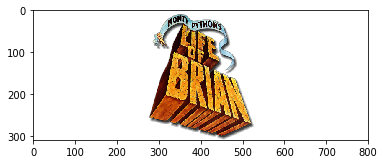

In [6]:
plt.imshow(image);

**Exercises:** Crop the image in the following ways using slicing:

1.  Slice away the white spacing, specifying only the part of the image that contains the movie title. 

2. Show just the part of the image with the letter "B"

3. Show just the part of the image with the letter "N".

4. Show just the part of the image with the "Monty Python's" Banner

5. Divide the brightness in a retangle around the word "Life" by 2.

### Special Topic: Calcium Imaging, Tiff files, Bit Depth, and Colormaps

There are lots of different things that can make working with your data special, and ignoring them can introduce a wide range of special problems.  Let's look at an example where a Tiff image file is loaded and previewed using Matplotlib's imread() and imshow() functions:

#### File Format: Reading Data Correctly

In [10]:
import matplotlib.pyplot as plt

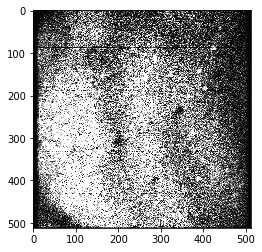

In [21]:
im = plt.imread("data/image00022.tif")
plt.imshow(im);

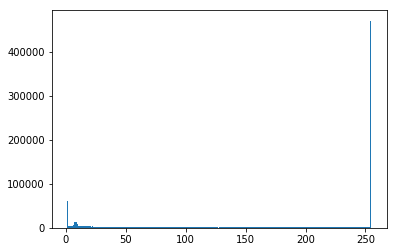

In [23]:
plt.hist(im.flatten(), bins=256);

Looks okay, right?  It's pretty, but that happens a lot when collecting data.  We can make out some bright spots, though--those must be our cells.  Should we assume that everything worked correctly, and we can start analyzing the data?

Well, let's see what the data looks like when we just select the bright spots:

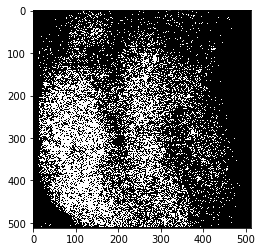

In [33]:
plt.imshow(im > 250, cmap='gray');

No, this is way too noisy!  Let's look at the details of the array and compare it to the image file's properties to see why:

In [24]:
im.dtype, im.shape

(dtype('uint8'), (512, 512, 4))

8-bit image, 4 color channels, 512x512 image.  Is this what should have been loaded?

In [25]:
#!pip install exifread

In [56]:
import exifread 
with open('data/image00022.tif', 'rb') as f:
    tags = exifread.process_file(f)
tags

{'Image ImageWidth': (0x0100) Long=512 @ 18,
 'Image ImageLength': (0x0101) Long=512 @ 30,
 'Image BitsPerSample': (0x0102) Short=32 @ 42,
 'Image Compression': (0x0103) Short=Uncompressed @ 54,
 'Image PhotometricInterpretation': (0x0106) Short=1 @ 66,
 'Image StripOffsets': (0x0111) Long=134 @ 78,
 'Image RowsPerStrip': (0x0116) Long=512 @ 90,
 'Image StripByteCounts': (0x0117) Long=1048576 @ 102,
 'Image PlanarConfiguration': (0x011C) Short=1 @ 114,
 'Image SampleFormat': (0x0153) Short=Float @ 126}

Take a look at the first three tags: "ImageWidth", "ImageLength", and "BitsPerSample".  They are 512 and 512, but the number of bits is actually 32, not 8.  Matplotlib didn't load the image correctly!  So, how do we solve this?  By using a tiff-specific file reader.

In [57]:
#!pip install tifffile

In [58]:
import tifffile as tiff

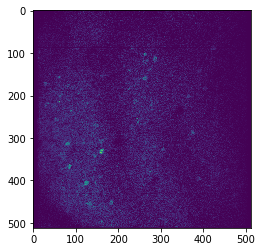

In [59]:
im = tiff.imread("data/image00022.tif")
plt.imshow(im)

In [60]:
im.dtype, im.shape

(dtype('float32'), (512, 512))

Much better!  When loading different files, it's really key to find the right library for your data.  Sometimes it takes a bit of searching to find the right one, but once you've found it life gets a lot easier.

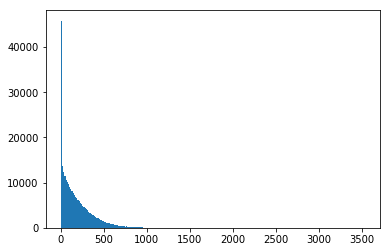

In [61]:
plt.hist(im.flatten(), bins=256);

In [62]:
from scipy import ndimage

In [74]:
from skimage import feature

In [80]:
im2 = im.astype(np.double)
im2.dtype

dtype('float64')

In [ ]:
result = feature.blob.blob_doh(im2)

In [71]:
ndimage.black_tophat()

(288.25078718450686, 211.8337672514167)

In [69]:
ndimage.histogram(im, 0, 3500, 3000,)

array([19408,  1395,  1579, ...,     0,     0,     0], dtype=int64)

Sure, there aren't so many bright spots in this data, but look at what happens when we just select them:

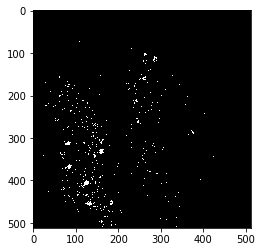

In [48]:
plt.imshow(im > 800, cmap='gray');

Pulling out the cell data is going to be a lot easier now.

#### Colormaps

What do the colors in the image represent?  Well, if we look at the shape of the image, we can see that there actually is no color channel, just "length" and "width":

In [223]:
im.shape

(512, 512)

In this case, the imshow() function is using a **colormap** to show the different brightness values using the colors on a monitor.  Here is the colormap:

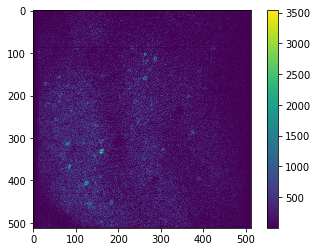

In [225]:
plt.imshow(im);
plt.colorbar();

Matoplotlib has many different colormaps available, each of which is useful for different situations.  By default, when no color channels (no 3rd dimension on the array) is present, the imshow() function will default to **"viridis"**.

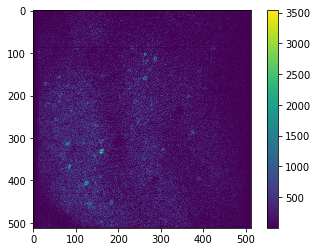

In [226]:
plt.imshow(im, cmap='viridis');
plt.colorbar();

To see the data in grayscale, we can use the **"gray"** colormap:

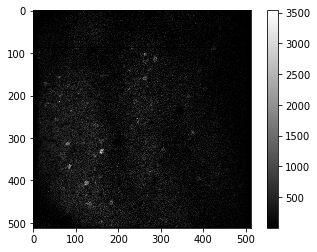

In [227]:
plt.imshow(im, cmap='gray');
plt.colorbar();

Notice how, although this better reflects what the camera is capturing, that it is more difficult to discern the difference between different color levels.  Viridis helps a lot with that.

There is another popular colormap that is used, "jet":

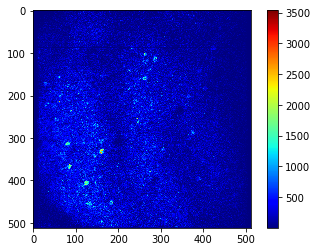

In [229]:
plt.imshow(im, cmap='jet');
plt.colorbar();

### Aside: Never Use Jet

**The "jet" colormap should be avoided at all costs.**  Let's look why by seeing one image, which just shows some sine-wave data:

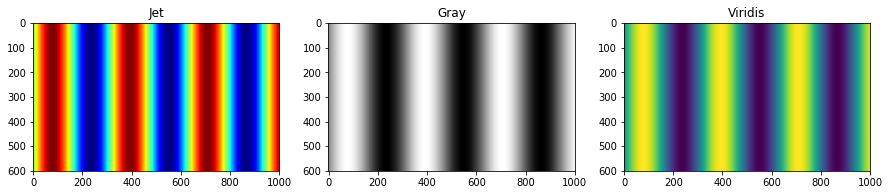

In [256]:
data = np.tile(np.sin(np.linspace(0, 20, 1000)), (600, 1))
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
ax1.imshow(data, cmap='jet'); ax1.set_title('Jet')
ax2.imshow(data, cmap='gray'); ax2.set_title('Gray')
ax3.imshow(data, cmap='viridis'); ax3.set_title('Viridis');

Which images look similar to each other?  Which ones look different?  Why?  

The key property for having good continuous-value colormaps is "perceptual uniformity". To see the full list of colormaps available with matplotlib and some of their properties, see this page: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html